<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/Class-deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [1]:
import pandas as pd
from IPython.display import display

In [2]:
!pwd

/content


In [3]:
!ls -l

total 104
drwxr-xr-x 1 root root   4096 Mar 23 14:22 sample_data
-rw-r--r-- 1 root root 100951 Apr  2 01:39 winequality-red.csv


In [4]:
red_wine = pd.read_csv('winequality-red.csv')

In [5]:
type(red_wine)

pandas.core.frame.DataFrame

In [6]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)

In [8]:
type(df_train)

pandas.core.frame.DataFrame

In [9]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,8.298928,0.526595,0.269777,2.509473,0.086906,15.630027,46.233691,0.996749,3.314468,0.656014,10.435865,5.620197
std,1.755558,0.173878,0.194403,1.276248,0.044144,10.070096,32.929577,0.001881,0.154276,0.156915,1.081857,0.800036
min,4.600000,0.120000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.870000,0.330000,8.400000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,0.071000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996800,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.632500,0.430000,2.600000,0.091000,21.000000,62.000000,0.997835,3.410000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,13.900000,0.611000,72.000000,289.000000,1.003200,3.900000,1.980000,14.900000,8.000000


In [10]:
df_valid = red_wine.drop(df_train.index)


In [11]:
df_valid.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,8.367917,0.530677,0.273771,2.607188,0.088773,16.445833,47.013542,0.996741,3.303292,0.663125,10.392951,5.672917
std,1.707741,0.190752,0.195900,1.680319,0.053284,11.307857,32.843151,0.001905,0.154523,0.195834,1.027415,0.824530
min,4.900000,0.120000,0.000000,1.200000,0.012000,2.000000,7.000000,0.990640,2.740000,0.370000,8.400000,3.000000
25%,7.200000,0.390000,0.100000,1.900000,0.069000,8.000000,21.750000,0.995580,3.200000,0.540000,9.500000,5.000000
50%,8.000000,0.520000,0.260000,2.200000,0.079500,14.000000,38.000000,0.996700,3.300000,0.610000,10.100000,6.000000
75%,9.200000,0.641250,0.420000,2.600000,0.090000,23.000000,64.250000,0.997837,3.390000,0.730000,11.000000,6.000000
max,15.500000,1.330000,1.000000,15.500000,0.610000,68.000000,152.000000,1.003690,4.010000,2.000000,14.000000,8.000000


In [12]:
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [13]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,8.298928,0.526595,0.269777,2.509473,0.086906,15.630027,46.233691,0.996749,3.314468,0.656014,10.435865,5.620197
std,1.755558,0.173878,0.194403,1.276248,0.044144,10.070096,32.929577,0.001881,0.154276,0.156915,1.081857,0.800036
min,4.600000,0.120000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.870000,0.330000,8.400000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,0.071000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996800,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.632500,0.430000,2.600000,0.091000,21.000000,62.000000,0.997835,3.410000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,13.900000,0.611000,72.000000,289.000000,1.003200,3.900000,1.980000,14.900000,8.000000


In [14]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [15]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,0.327339,0.278490,0.341489,0.123806,0.091692,0.206057,0.142169,0.508681,0.431523,0.197584,0.313210,0.524039
std,0.155359,0.119094,0.246080,0.098173,0.076507,0.141832,0.116359,0.143223,0.149782,0.095100,0.166439,0.160007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.191781,0.113924,0.076923,0.064125,0.084507,0.056537,0.421173,0.330097,0.133333,0.169231,0.400000
50%,0.292035,0.273973,0.316456,0.100000,0.077990,0.183099,0.113074,0.512567,0.436893,0.175758,0.276923,0.600000
75%,0.407080,0.351027,0.544304,0.130769,0.098787,0.281690,0.197880,0.591394,0.524272,0.242424,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_train["quality"]

1109    0.6
1032    0.4
1002    0.8
487     0.6
979     0.4
       ... 
640     0.4
104     0.4
815     0.4
998     0.6
1075    0.8
Name: quality, Length: 1119, dtype: float64

In [17]:
# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [18]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,0.327339,0.278490,0.341489,0.123806,0.091692,0.206057,0.142169,0.508681,0.431523,0.197584,0.313210
std,0.155359,0.119094,0.246080,0.098173,0.076507,0.141832,0.116359,0.143223,0.149782,0.095100,0.166439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.191781,0.113924,0.076923,0.064125,0.084507,0.056537,0.421173,0.330097,0.133333,0.169231
50%,0.292035,0.273973,0.316456,0.100000,0.077990,0.183099,0.113074,0.512567,0.436893,0.175758,0.276923
75%,0.407080,0.351027,0.544304,0.130769,0.098787,0.281690,0.197880,0.591394,0.524272,0.242424,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
y_train.describe()

count    1119.000000
mean        0.524039
std         0.160007
min         0.000000
25%         0.400000
50%         0.600000
75%         0.600000
max         1.000000
Name: quality, dtype: float64

In [20]:
X_valid.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.333444,0.281286,0.346545,0.131322,0.094927,0.217547,0.144924,0.508097,0.420672,0.201894,0.306608
std,0.151128,0.130652,0.247975,0.129255,0.092346,0.159266,0.116054,0.145095,0.150022,0.118687,0.158064
min,0.026549,0.000000,0.000000,0.023077,-0.038128,0.014085,0.003534,0.043412,-0.126214,0.024242,0.000000
25%,0.230088,0.184932,0.126582,0.076923,0.060659,0.098592,0.055654,0.419650,0.320388,0.127273,0.169231
50%,0.300885,0.273973,0.329114,0.100000,0.078856,0.183099,0.113074,0.504950,0.417476,0.169697,0.261538
75%,0.407080,0.357021,0.531646,0.130769,0.097054,0.309859,0.205830,0.591584,0.504854,0.242424,0.400000
max,0.964602,0.828767,1.265823,1.123077,0.998267,0.943662,0.515901,1.037319,1.106796,1.012121,0.861538


In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6144      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [24]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
)

Epoch 1/100
5/5 [==============================] - 2s 132ms/step - loss: 0.2862 - val_loss: 0.1336
Epoch 2/100
5/5 [==============================] - 0s 38ms/step - loss: 0.1435 - val_loss: 0.1247
Epoch 3/100
5/5 [==============================] - 0s 45ms/step - loss: 0.1296 - val_loss: 0.1178
Epoch 4/100
5/5 [==============================] - 0s 55ms/step - loss: 0.1190 - val_loss: 0.1098
Epoch 5/100
5/5 [==============================] - 0s 48ms/step - loss: 0.1134 - val_loss: 0.1120
Epoch 6/100
5/5 [==============================] - 0s 50ms/step - loss: 0.1087 - val_loss: 0.1022
Epoch 7/100
5/5 [==============================] - 0s 41ms/step - loss: 0.1053 - val_loss: 0.1013
Epoch 8/100
5/5 [==============================] - 0s 75ms/step - loss: 0.1038 - val_loss: 0.1036
Epoch 9/100
5/5 [==============================] - 0s 74ms/step - loss: 0.1021 - val_loss: 0.1003
Epoch 10/100
5/5 [==============================] - 0s 56ms/step - loss: 0.1007 - val_loss: 0.1025
Epoch 11/100
5/5 [

# 2) Define a linear model

Now define a linear model appropriate for this task. Pay attention to how many inputs and outputs the model should have.

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6144      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


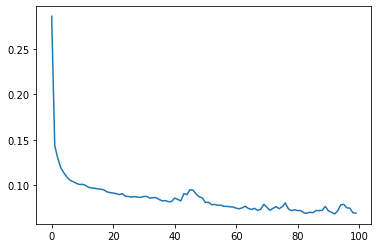

In [26]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();